In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
y = train_data.Survived
x = train_data

<AxesSubplot:>

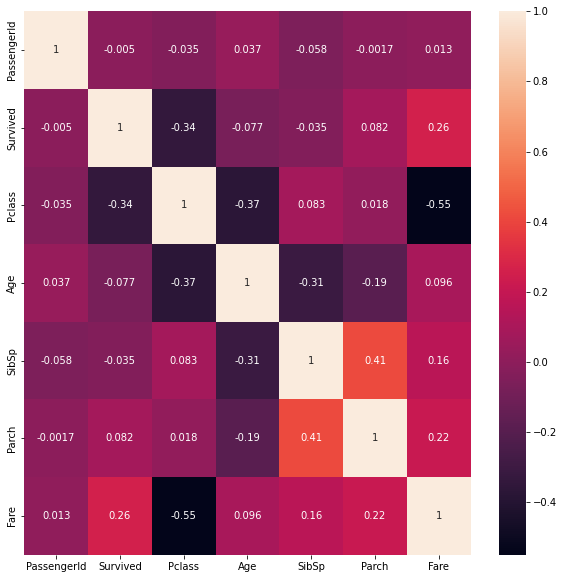

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
corr_mat = x.corr()
sns.heatmap(corr_mat, annot = True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

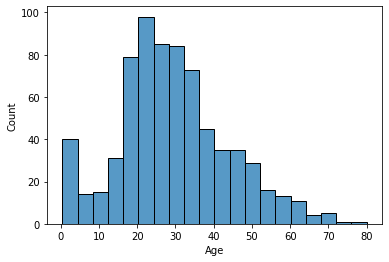

In [9]:
sns.histplot(data = x, x = x['Age'])

The mean here would be skewed by 74 and 0.92

In [10]:
mode = x['Age'].mode()[0]
print(mode)
median = x['Age'].median()
median

24.0


28.0

In [11]:
x = x.fillna({'Age': mode})
test_data = test_data.fillna({'Age': mode})
x.Age.isnull().sum()
test_data.Age.isnull().sum()

0

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

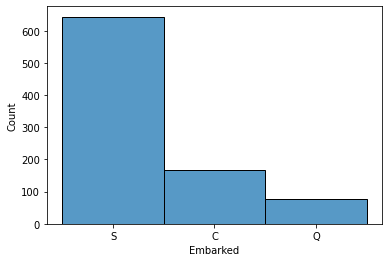

In [12]:
sns.histplot(data = x, x = x['Embarked'])

In [13]:
x = x.fillna({'Embarked': 'S'})
x.Embarked.isnull().sum()

0

<AxesSubplot:xlabel='Fare', ylabel='Density'>

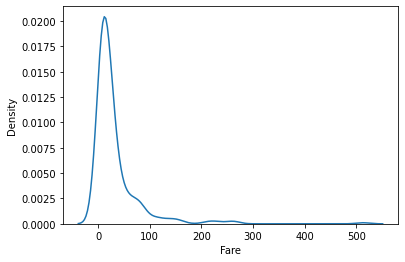

In [14]:
sns.kdeplot(data = x, x = 'Fare')

In [15]:
print(test_data['Fare'].mean())
test_data = test_data.fillna({'Fare': test_data['Fare'].mean()})

35.627188489208635


In [16]:
x = x.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis = 1)
test_data_ids = test_data['PassengerId']
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [17]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
obj_cols = ['Sex', 'Embarked']
OH_cols_x = pd.DataFrame(OH_encoder.fit_transform(x[obj_cols]))
OH_cols_x.index = x.index
OH_cols_x.columns = OH_encoder.get_feature_names_out()
OH_cols_test = pd.DataFrame(OH_encoder.fit_transform(test_data[obj_cols]))
OH_cols_test.index = test_data.index
OH_cols_test.columns = OH_encoder.get_feature_names_out() 

x = x.drop(obj_cols, axis=1)
test_data = test_data.drop(obj_cols, axis = 1)

x = x.join(OH_cols_x)
test_data = test_data.join(OH_cols_test)
display(x.head())
display(test_data.head())


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 2)
model.fit(x, y)



RandomForestClassifier(random_state=2)

In [19]:
preds = model.predict(test_data)

In [20]:
final = pd.DataFrame({'PassengerId':test_data_ids,'Survived':preds})
print(final)
final.to_csv('/kaggle/working/submission2.csv',index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
